In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv("Concrete_Data .csv")
df

,cement,slag,flyash,water,superplas,coarse_agg,fine_agg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [3]:
df.isnull().sum()

cement        0
slag          0
flyash        0
water         0
superplas     0
coarse_agg    0
fine_agg      0
age           0
strength      0
dtype: int64

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [5]:

from sklearn.linear_model import LinearRegression

In [6]:
print(df.columns.tolist())


['cement', 'slag', 'flyash', 'water', 'superplas', 'coarse_agg', 'fine_agg', 'age', 'strength']


In [7]:
df.columns = df.columns.str.strip()


In [8]:
features = ['cement', 'slag', 'flyash', 'water', 'superplas', 'coarse_agg', 'fine_agg', 'age']  
targets = ['strength'] 



In [9]:
model = LinearRegression(fit_intercept=True) 
results = model.fit(df[features], df[targets])

In [10]:
print("The R^2 for this dataset in this Linear Regression is: ", results.score(df[features],df[targets]))

The R^2 for this dataset in this Linear Regression is:  0.6155198704142721


In [11]:
train_dataset = df.sample(frac=0.8,random_state=69) # Take 80% of dataset for training.
test_dataset = df.drop(train_dataset.index) 
print('Training dataset shape:', train_dataset.shape)
print('Testing dataset shape:', test_dataset.shape)

Training dataset shape: (824, 9)
Testing dataset shape: (206, 9)


     cement      slag    flyash     water  superplas  coarse_agg  fine_agg  \
0 -0.290939  1.223851 -0.912456  2.102973  -1.221546   -0.524113 -2.073599   
1 -0.460313 -1.068428  1.044005  0.361426   0.082675   -0.075890  1.238969   
2  0.972858  1.023526 -0.912456 -1.339689   1.310373    2.077535 -1.961713   
3  1.071115 -1.068428 -0.912456  0.486578  -1.221546   -0.414423  0.113932   
4 -0.136537 -1.068428 -0.912456  0.207646  -1.221546    1.775726  0.093599   

        age  strength  
0  2.417297  0.286787  
1 -1.665705 -1.624762  
2  0.122103  0.999114  
3 -1.040709 -0.400190  
4 -1.040709 -1.634796  


C:\Users\shiva\AppData\Local\Temp\ipykernel_11400\2126063729.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normed_train_data['cement'], kde=True, color='orange')


<Axes: xlabel='cement', ylabel='Density'>

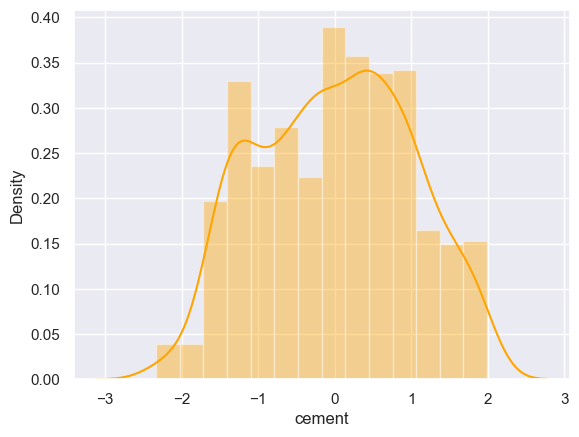

In [12]:
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer()
transformed_train_data = pd.DataFrame(transformer.fit_transform(train_dataset), columns=train_dataset.columns)
transformed_test_data = pd.DataFrame(transformer.transform(test_dataset), columns=test_dataset.columns)

train_stats = transformed_train_data.describe().transpose()

def standardise(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = standardise(transformed_train_data)
normed_test_data = standardise(transformed_test_data)

print(normed_train_data.head())
sns.distplot(normed_train_data['cement'], kde=True, color='orange')


C:\Users\shiva\AppData\Local\Temp\ipykernel_14720\2510520335.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normed_train_data['water'], kde=True, color='red')


<Axes: xlabel='water', ylabel='Density'>

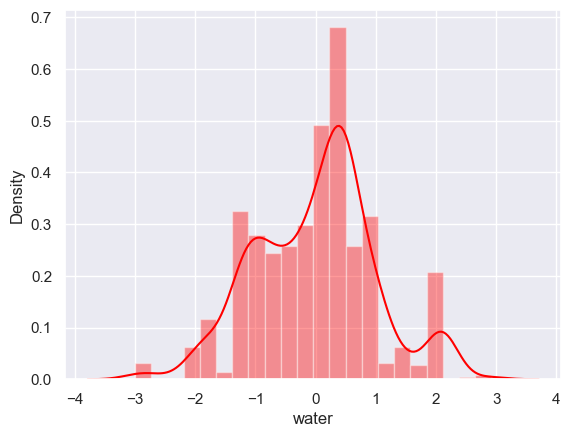

In [11]:
sns.distplot(normed_train_data['water'], kde=True, color='red')

In [13]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

R² Score: 0.6388
Root Mean Squared Error (RMSE): 9.6479
Mean Absolute Error (MAE): 7.4618
Mean Squared Error (MSE): 93.0826


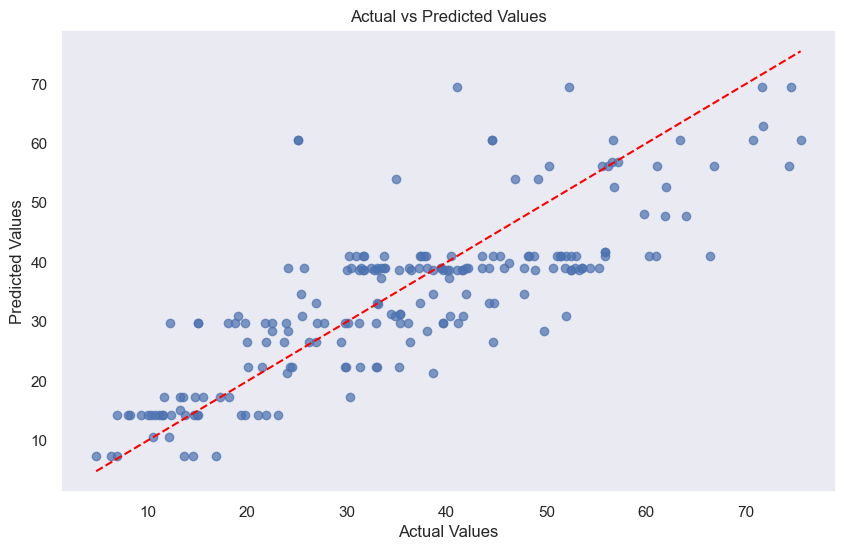

In [14]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
X_train, X_test, y_train, y_test = train_test_split(df[features], df[targets], test_size=0.2, random_state=42)


# Initialize and fit the Decision Tree Regressor
dtr = DecisionTreeRegressor(max_depth=5, min_samples_split=5, min_samples_leaf=2)  # Adjust parameters as needed
dtr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dtr.predict(X_test)

# Evaluate the model
r2_score = dtr.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


print(f"R² Score: {r2_score:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()
plt.show()

C:\Users\shiva\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R² Score: 0.7428
Root Mean Squared Error (RMSE): 8.1414
Mean Absolute Error (MAE): 6.3202
Mean Squared Error (MSE): 66.2822


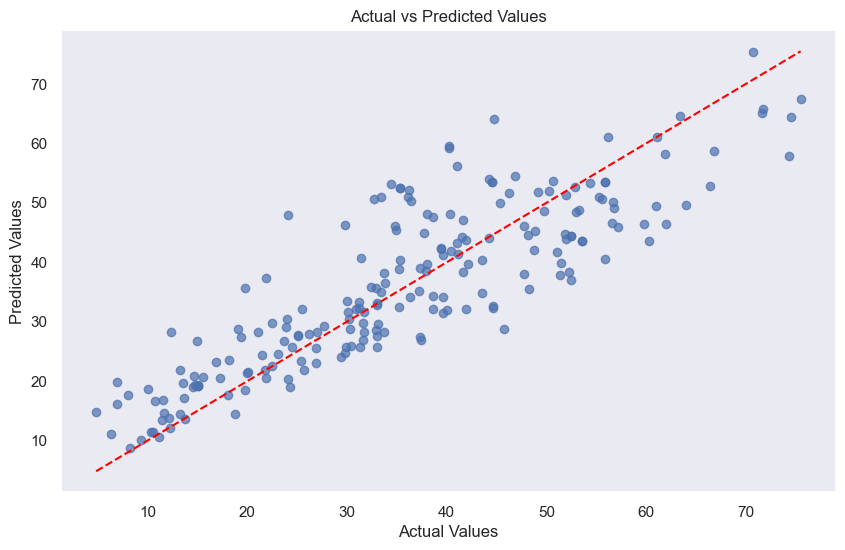

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
X_train, X_test, y_train, y_test = train_test_split(df[features], df[targets], test_size=0.2, random_state=42)



svr = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)  
svr.fit(X_train, y_train)


y_pred = svr.predict(X_test)


r2_score = svr.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


print(f"R² Score: {r2_score:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()
plt.show()

R² Score: 0.7843
Root Mean Squared Error (RMSE): 7.4554
Mean Absolute Error (MAE): 5.9696
Mean Squared Error (MSE): 55.5825


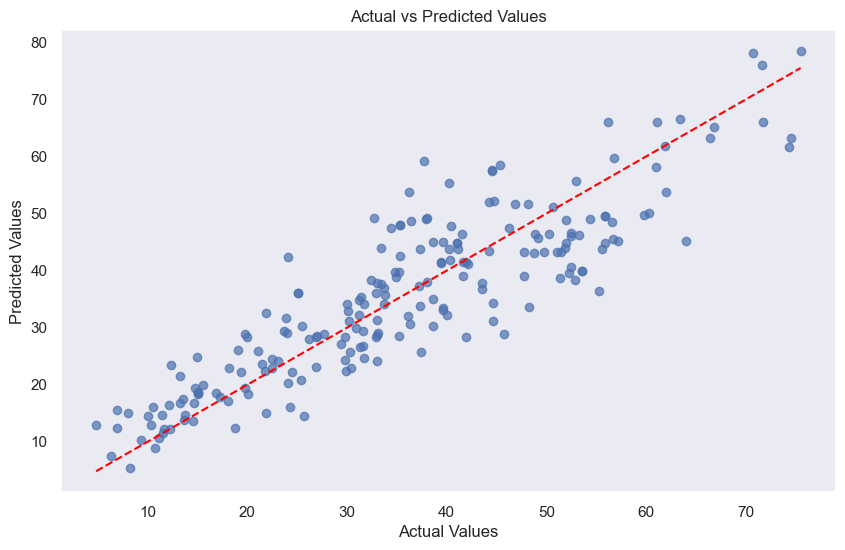

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
X_train, X_test, y_train, y_test = train_test_split(df[features], df[targets], test_size=0.2, random_state=42)


degree = 2  
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)


model = LinearRegression()
model.fit(X_train_poly, y_train)


y_pred = model.predict(X_test_poly)


r2_score = model.score(X_test_poly, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


print(f"R² Score: {r2_score:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()
plt.show()

C:\Users\shiva\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R² Score: 0.8760
Root Mean Squared Error (RMSE): 5.6530
Mean Absolute Error (MAE): 4.0775
Mean Squared Error (MSE): 31.9564


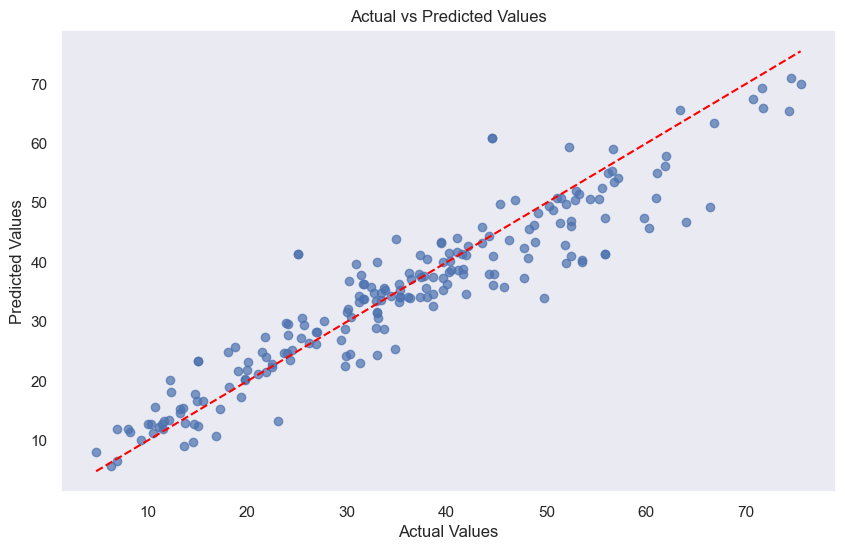

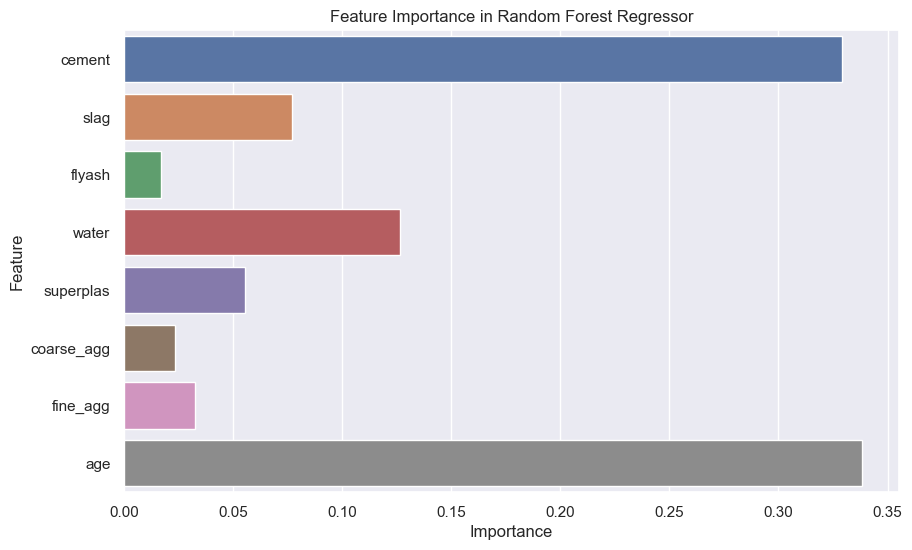

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
X_train, X_test, y_train, y_test = train_test_split(df[features], df[targets], test_size=0.2, random_state=42)

rfr = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)


r2_score = rfr.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


print(f"R² Score: {r2_score:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()
plt.show()

feature_importances = rfr.feature_importances_
features_names = features
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features_names)
plt.title("Feature Importance in Random Forest Regressor")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

R² Score: 0.7370
Root Mean Squared Error (RMSE): 8.2318
Mean Absolute Error (MAE): 6.4423
Mean Squared Error (MSE): 67.7621


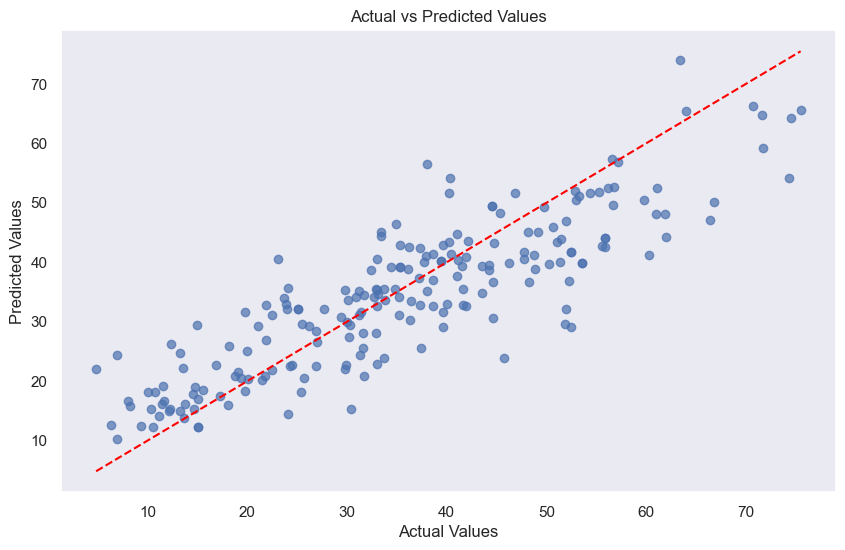

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(df[features], df[targets], test_size=0.2, random_state=42)

knn = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto')  
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

r2_score = knn.score(X_test, y_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2_score:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()
plt.show()


In [43]:
pip install lightgbm


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 262.6 kB/s eta 0:00:06
   - -------------------------------------- 0.0/1.4 MB 196.9 kB/s eta 0:00:08
   - -------------------------------------- 0.0/1.4 MB 196.9 kB/s eta 0:00:08
   - -------------------------------------- 0.1/1.4 MB 192.5 kB/s eta 0:00:08
   - -------------------------------------- 0.1/1.4 MB 192.5 kB/s eta 0:00:08
   - -------------------------------------- 0.1/1.4 MB 192.5 kB/s eta 0:00:08
   -- ------------------------------------- 0.1/1.4 MB 183.3 kB/s eta 0:00:08
   -- ----------------------------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 973
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 8
[LightGBM] [Info] Start training from score 35.857864
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

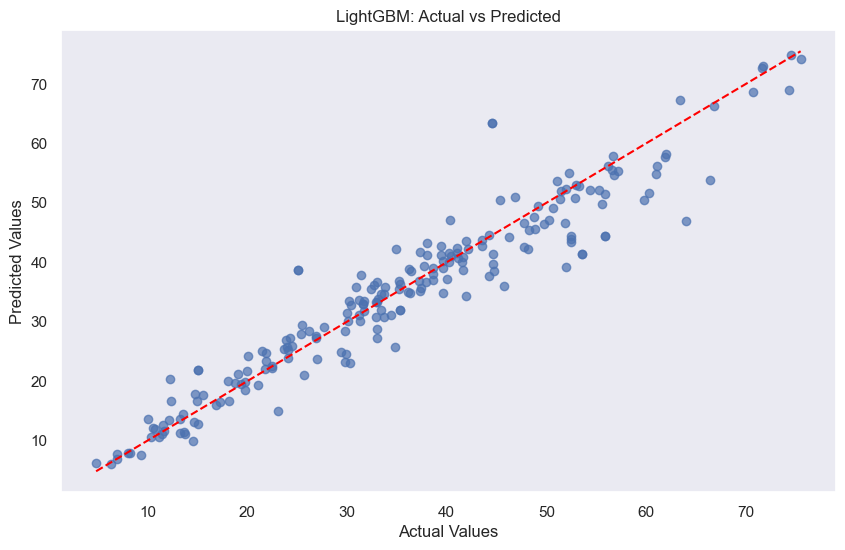

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import lightgbm as lgb

# Assuming df is your DataFrame and features, target are defined

X_train, X_test, y_train, y_test = train_test_split(df[features], df[targets], test_size=0.2, random_state=42)


lgbm = lgb.LGBMRegressor(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100)
lgbm.fit(X_train, y_train)


y_pred_lgbm = lgbm.predict(X_test)


r2_score_lgbm = lgbm.score(X_test, y_test)
rmse_lgbm = np.sqrt(mean_squared_error(y_test, y_pred_lgbm))
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)


print(f"LightGBM R² Score: {r2_score_lgbm:.4f}")
print(f"LightGBM RMSE: {rmse_lgbm:.4f}")
print(f"LightGBM MAE: {mae_lgbm:.4f}")
print(f"LightGBM MSE: {mse_lgbm:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lgbm, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("LightGBM: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()
plt.show()


XGBoost R² Score: 0.9041
XGBoost RMSE: 4.9698
XGBoost MAE: 3.2579
XGBoost MSE: 24.6989


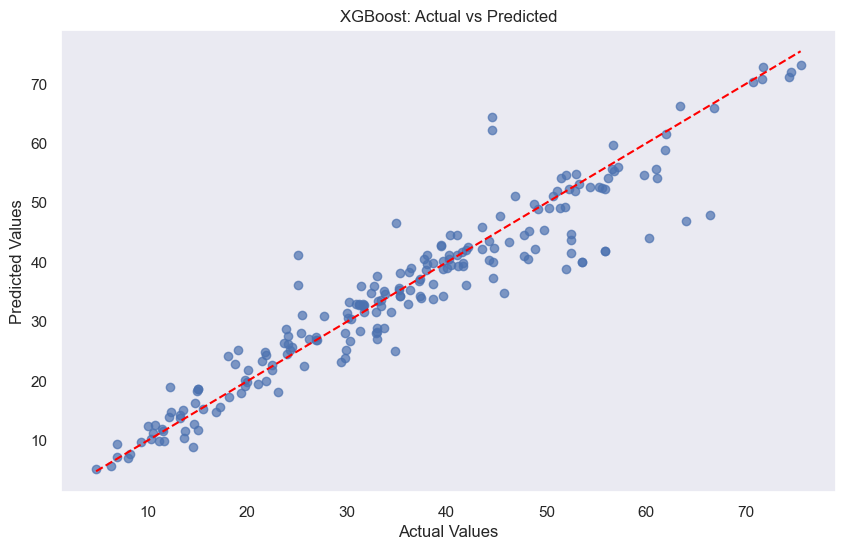

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb


X_train, X_test, y_train, y_test = train_test_split(df[features], df[targets], test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.1, max_depth=6, n_estimators=100, seed=42)
xgb_model.fit(X_train, y_train)


y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
r2_score_xgb = xgb_model.score(X_test, y_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

print(f"XGBoost R² Score: {r2_score_xgb:.4f}")
print(f"XGBoost RMSE: {rmse_xgb:.4f}")
print(f"XGBoost MAE: {mae_xgb:.4f}")
print(f"XGBoost MSE: {mse_xgb:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("XGBoost: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()
plt.show()


In [17]:
import pickle
with open("xgboost_model.pkl", "wb") as f:
    pickle.dump(xgb_model, f)

In [19]:
with open("xgboost_model.pkl", "rb") as f:
    xgb_model = pickle.load(f)

# Now you can use `xgb_model.predict()` with new data
